#Assignment: Movie Ratings & Revenue Analysis
##Step 1: Create a CSV – movies.csv

In [1]:
data = """MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000"""
with open("movies.csv", "w") as f:
    f.write(data)

#PART 1: Pandas Operations


In [2]:
# 1. Load movies.csv into a Pandas DataFrame.
import pandas as pd
df = pd.read_csv('movies.csv')
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


In [ ]:
# 2. Convert ReleaseDate to datetime.
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [7]:
# 3. Calculate Profit = Revenue - Budget .
df['Profit'] = df['Revenue'] - df['Budget']
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit  
0  160000000  6.655328e+08  
1  185000000  8.195584e+08  
2  200000000  1.987464e+09  
3  165000000  5.124713e+08  
4   55000000  1.019251e+09  
5   29000000           NaN  
6  356000000  2.441801e+09  


In [9]:
# 4. Add a column "Era" :
# Before 2000 → Classic
# 2000-2010 → Mid
# After 2010 → Modern
def classify_era(date):
    year = date.year
    if year < 2000:
        return 'Classic'
    elif 2000 <= year <= 2010:
        return 'Mid'
    else:
        return 'Modern'

df['Era'] = df['ReleaseDate'].apply(classify_era)
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


In [12]:
# 5. Handle nulls in Revenue by filling with average revenue.
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


In [13]:
# 6. Sort by Rating descending.
print(df.sort_values(by='Rating',ascending= False))

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   

      Budget        Profit      Era  
1  185000000  8.195584e+08      Mid  
0  160000000  6.655328e+08      Mid  
3  165000000  5.124713e+08   Modern  
6  356000000  2.441801e+09   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
2  200000000  1.987464e+09  Classic  


In [14]:
# 7. Group by Genre → average Rating & total Revenue.
print(df.groupby('Genre').agg({'Rating': 'mean', 'Revenue': 'sum'}))

         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


In [19]:
# 8. Filter movies with Rating ≥ 8.5 and Profit > 500M.
print(df[(df['Rating']>=8.5) & (df['Profit']> 500000000)])

   MovieID            Title   Genre ReleaseDate  Rating       Revenue  \
0        1        Inception  Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2  The Dark Knight  Action  2008-07-18     9.0  1.004558e+09   
3        4     Interstellar  Sci-Fi  2014-11-07     8.6  6.774713e+08   

      Budget       Profit     Era  
0  160000000  665532764.0     Mid  
1  185000000  819558444.0     Mid  
3  165000000  512471339.0  Modern  


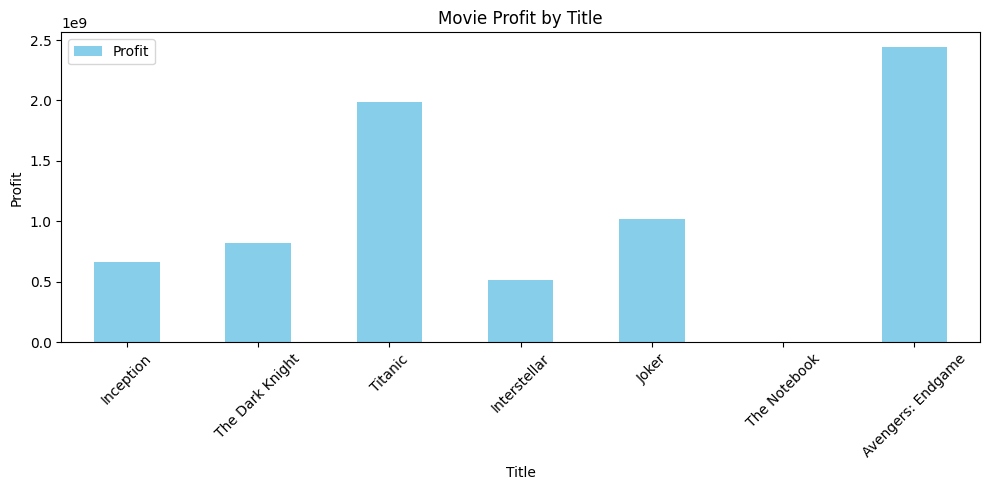

In [21]:
# 9. Plot bar chart of Movie Title vs Profit.
import matplotlib.pyplot as plt
df.plot(kind='bar', x='Title', y='Profit', color='skyblue', figsize=(10, 5))
plt.title("Movie Profit by Title")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PART 2: PySpark Operations

In [118]:
# 1. Read the same CSV using PySpark.
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MovieRatingsAnalysis").getOrCreate()
df = spark.read.option("header", True).option("inferSchema", True).csv("movies.csv")
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+



In [120]:
# 2. Create Profit column ( Revenue - Budget ).
df1 = df # for future use
from pyspark.sql.functions import col
df = df.withColumn("Profit", col("Revenue") - col("Budget"))
df.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+



In [121]:
# 3. Filter where Genre == 'Sci-Fi' and Profit > 500000000 .
df.filter((col("Genre") == "Sci-Fi") & (col("Profit") > 500000000)).show()

+-------+------------+------+-----------+------+---------+---------+---------+
|MovieID|       Title| Genre|ReleaseDate|Rating|  Revenue|   Budget|   Profit|
+-------+------------+------+-----------+------+---------+---------+---------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|825532764|160000000|665532764|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|677471339|165000000|512471339|
+-------+------------+------+-----------+------+---------+---------+---------+



In [122]:
# 4. Group by Genre → avg(Rating) , sum(Profit)
df.groupBy("Genre").agg({"Rating": "avg", "Profit": "sum"}).show()

+-------+-----------+-----------+
|  Genre|avg(Rating)|sum(Profit)|
+-------+-----------+-----------+
|Romance|       7.85| 1987463944|
|  Drama|        8.4| 1019251311|
| Action|        8.7| 3261359008|
| Sci-Fi|        8.7| 1178004103|
+-------+-----------+-----------+



In [124]:
# 5. Use when().otherwise() to classify Rating as:
# =9 → Blockbuster
# 8–9 → Hit
# below 8 → Average
from pyspark.sql.functions import when
df = df.withColumn("Category", when(col("Rating") == 9.0, "Blockbuster").when((col("Rating") >= 8.0) & (col("Rating") < 9.0), "Hit").otherwise("Average"))
df.select("Title", "Rating", "Category").show()

+-----------------+------+-----------+
|            Title|Rating|   Category|
+-----------------+------+-----------+
|        Inception|   8.8|        Hit|
|  The Dark Knight|   9.0|Blockbuster|
|          Titanic|   7.8|    Average|
|     Interstellar|   8.6|        Hit|
|            Joker|   8.4|        Hit|
|     The Notebook|   7.9|    Average|
|Avengers: Endgame|   8.4|        Hit|
+-----------------+------+-----------+



In [125]:
# 6. Drop the Budget column.
df = df.drop('Budget')
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|   Category|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL|      NULL|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Hit|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+



In [126]:
# 7. Fill null revenue with average (use na.fill() or na.replace() ).
from pyspark.sql.functions import avg
avg_rev = df.select(avg("Revenue")).collect()[0][0]
df = df.fillna({"Revenue": avg_rev})
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|   Category|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|    Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|    Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Hit|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+



In [127]:
# 8. Convert ReleaseDate to date type, extract year and month .
from pyspark.sql.functions import to_date , year, month
df = df.withColumn("ReleaseDate", to_date("ReleaseDate", "yyyy-MM-dd"))
df = df.withColumn("Year", year("ReleaseDate"))
df = df.withColumn("Month", month("ReleaseDate"))
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+-----------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|   Category|Year|Month|
+-------+-----------------+-------+-----------+------+----------+----------+-----------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Hit|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|Blockbuster|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|    Average|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Hit|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Hit|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|    Average|2004|    6|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Hit|2019|    4|


In [128]:
# 9. Use a window function to rank movies within each genre by profit.
from pyspark.sql.window import Window
from pyspark.sql.functions import rank
windowSpec = Window.partitionBy("Genre").orderBy(col("Profit").desc())
df = df.withColumn("Rank", rank().over(windowSpec))
df.select("Title", "Genre", "Profit", "Rank").show()

+-----------------+-------+----------+----+
|            Title|  Genre|    Profit|Rank|
+-----------------+-------+----------+----+
|Avengers: Endgame| Action|2441800564|   1|
|  The Dark Knight| Action| 819558444|   2|
|            Joker|  Drama|1019251311|   1|
|          Titanic|Romance|1987463944|   1|
|     The Notebook|Romance|      NULL|   2|
|        Inception| Sci-Fi| 665532764|   1|
|     Interstellar| Sci-Fi| 512471339|   2|
+-----------------+-------+----------+----+



#PART 3: JSON + Union Example

In [158]:
json_data = '''
[
{"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue":
1456000000, "Budget": 145000000},
{"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue":
950000000, "Budget": 100000000}
]
'''

with open("movies_bonus.json", "w") as f:
    f.write(json_data)


In [159]:
# 1. Read this JSON using PySpark.
bonus_df = spark.read.option("multiline", True).json("movies_bonus.json")
bonus_df.show()

+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



In [160]:
# 2. Union it with your original movies DataFrame.
from pyspark.sql.functions import lit
bonus_df = bonus_df.withColumn("Profit", lit(None)).withColumn("ReleaseDate", lit(None))
# here i am using df1 which is a saved copy of df before droping budget
merged_df = df1.unionByName(bonus_df)
merged_df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
|      8|           Barbie|  Drama|       NULL|   7.5|1456000000|145000000|      NULL|
|      9|      Oppenheimer|  Drama|       N

In [161]:
# i am cleaning the null values in Profit of latest added data for further use (calculating ROI)
merged_df = merged_df.withColumn("Profit", when(col("Profit").isNull(), col("Revenue") - col("Budget")).otherwise(col("Profit")))
merged_df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
|      8|           Barbie|  Drama|       NULL|   7.5|1456000000|145000000|1311000000|
|      9|      Oppenheimer|  Drama|       N

In [162]:
# 3. Show top 5 highest grossing movies.
merged_df.orderBy(col("Revenue").desc()).select("Title", "Revenue").show(5)

+-----------------+----------+
|            Title|   Revenue|
+-----------------+----------+
|Avengers: Endgame|2797800564|
|          Titanic|2187463944|
|           Barbie|1456000000|
|            Joker|1074251311|
|  The Dark Knight|1004558444|
+-----------------+----------+
only showing top 5 rows



In [163]:
# 4. Save final merged DataFrame as CSV.
merged_df.write.mode("overwrite").option("header", True).csv("final_movies.csv")

#Bonus:


In [164]:
# Create a column ReturnOnInvestment = Profit / Budget
merged_df = merged_df.withColumn("ROI", col("Profit") / col("Budget"))

In [165]:
# Show top ROI movies (minimum budget50M)
merged_df.filter(col("Budget") >= 50000000).orderBy(col("ROI").desc()).select("Title", "ROI").show()

+-----------------+-----------------+
|            Title|              ROI|
+-----------------+-----------------+
|            Joker|18.53184201818182|
|          Titanic|       9.93731972|
|           Barbie|9.041379310344828|
|      Oppenheimer|              8.5|
|Avengers: Endgame|6.858990348314607|
|  The Dark Knight|4.430045643243243|
|        Inception|      4.159579775|
|     Interstellar|3.105886903030303|
+-----------------+-----------------+



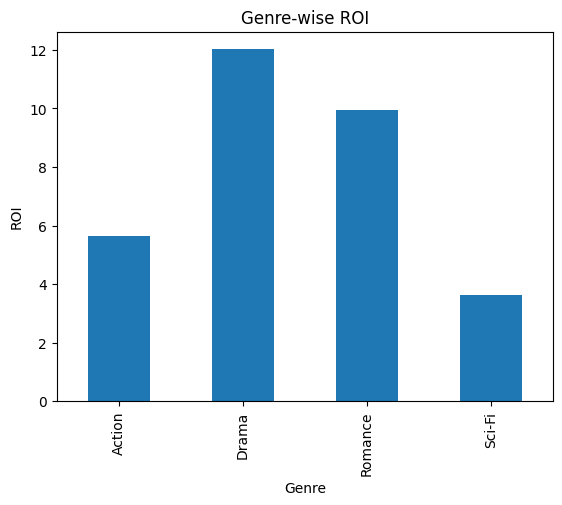

In [166]:
# Plot genre-wise ROI as a bar chart using Pandas
pds = merged_df.select("Genre", "ROI").toPandas()
import matplotlib.pyplot as plt
pds.groupby("Genre")["ROI"].mean().plot(kind="bar", title="Genre-wise ROI")
plt.ylabel("ROI")
plt.show()